# Project Machine Learning II - Jan Schmid

test

## Installation of the needed packages

In [61]:
# Install necessary packages
!pip install langdetect transformers torch

# Import necessary packages
import os
import re
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data gathering and Processing

In [29]:
# Import the necessary package for mounting Google Drive in Google Colab
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define the file paths
path1 = "/content/drive/MyDrive/ML_Project/data/New_Delhi_reviews.csv"
path2 = "/content/drive/MyDrive/ML_Project/data/tripadvisor_hotel_reviews.csv"
path3 = "/content/drive/MyDrive/ML_Project/data/Reviews.csv"

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import of files using local IDE
#df1 = pd.read_csv('data/New_Delhi_reviews.csv')
#df2 = pd.read_csv('data/tripadvisor_hotel_reviews.csv')
#df3 = pd.read_csv ('data/Reviews.csv')

In [30]:
df1.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [31]:
#rename the columns
df1.rename(columns={'rating_review':'Rating', 'review_full':'Review'}, inplace=True)

In [32]:
df2.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [33]:
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
# Drop unnecessary columns from df3 DataFrame
df3.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1, inplace=True)

df3.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [35]:
#rename the columns
df3.rename(columns={'Score':'Rating', 'Text':'Review'}, inplace=True)
df3.head()

,Rating,Review
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


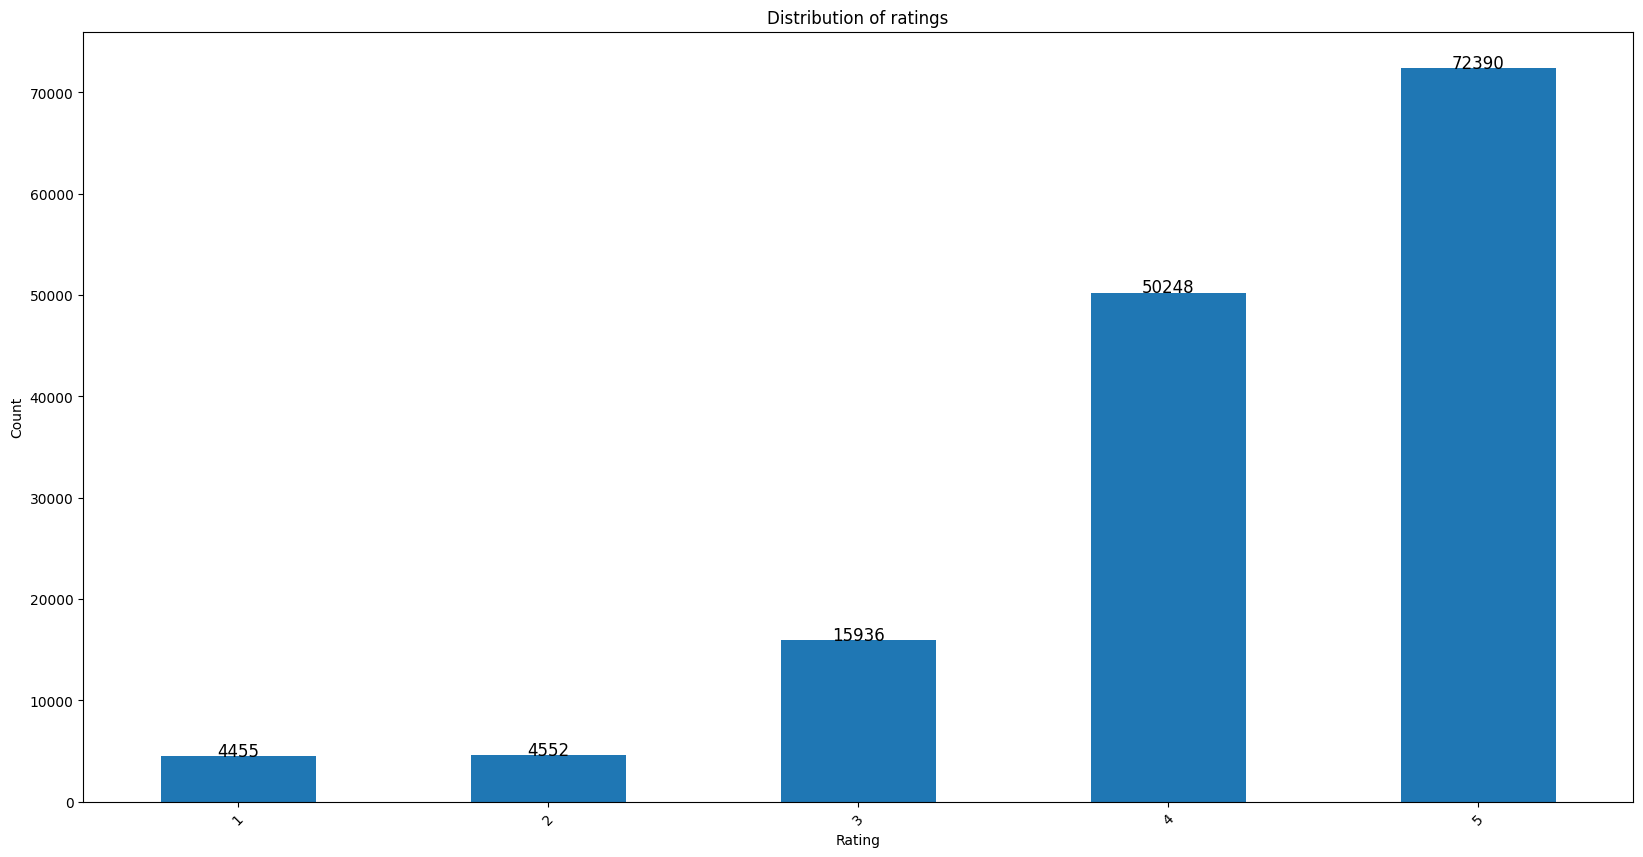

In [36]:
# Create a barchart for the ratings in the ratings dataframe
ax = df1['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df1['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

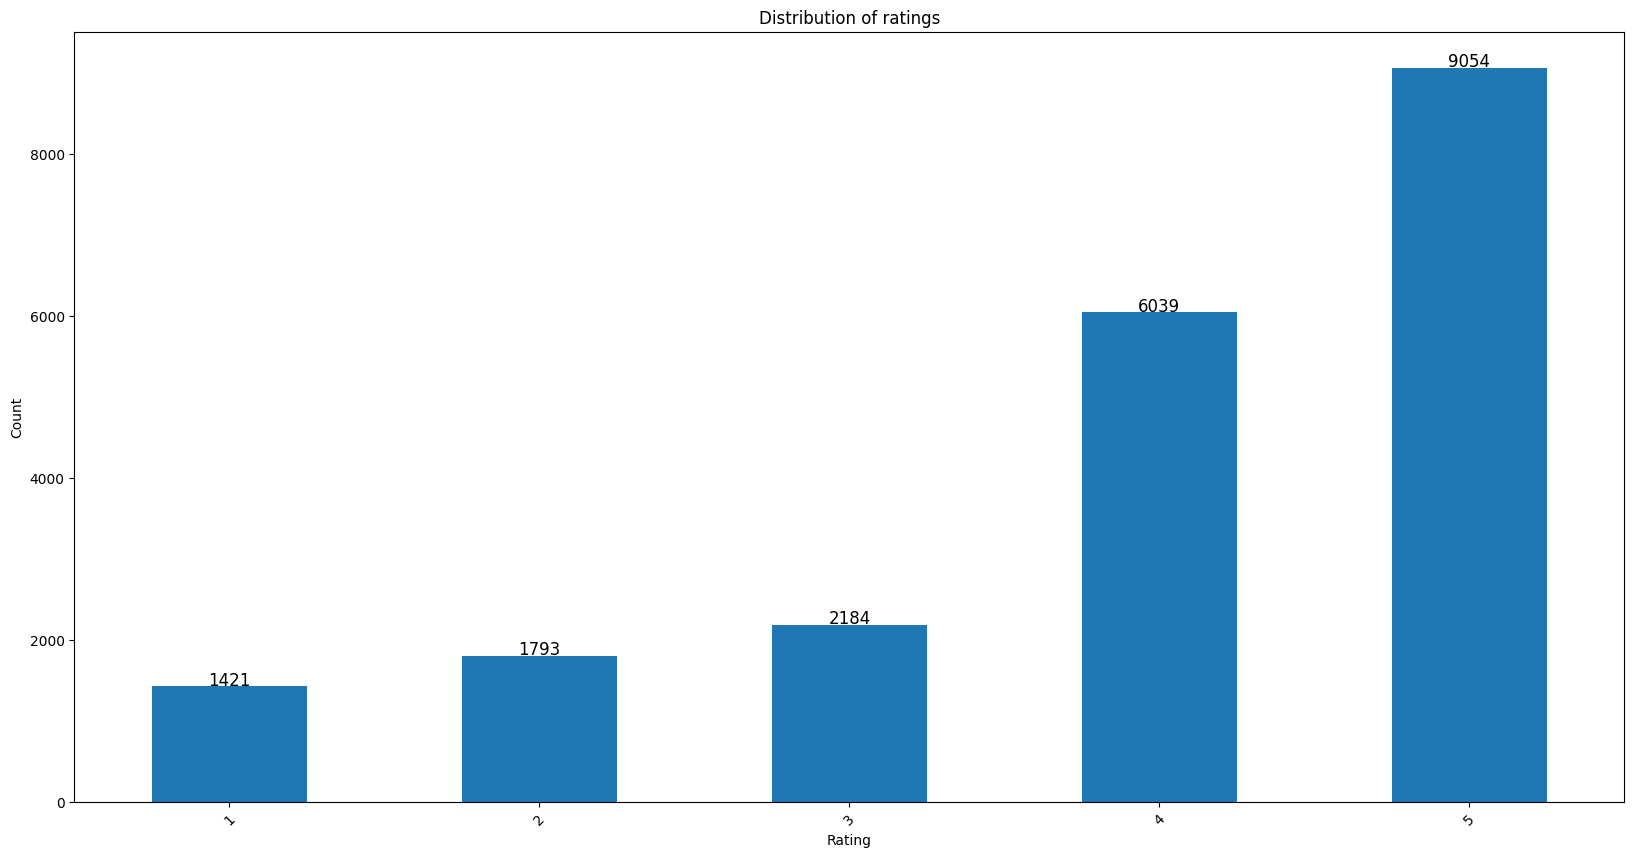

In [37]:
# Create a barchart for the ratings in the ratings dataframe
ax = df2['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df2['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

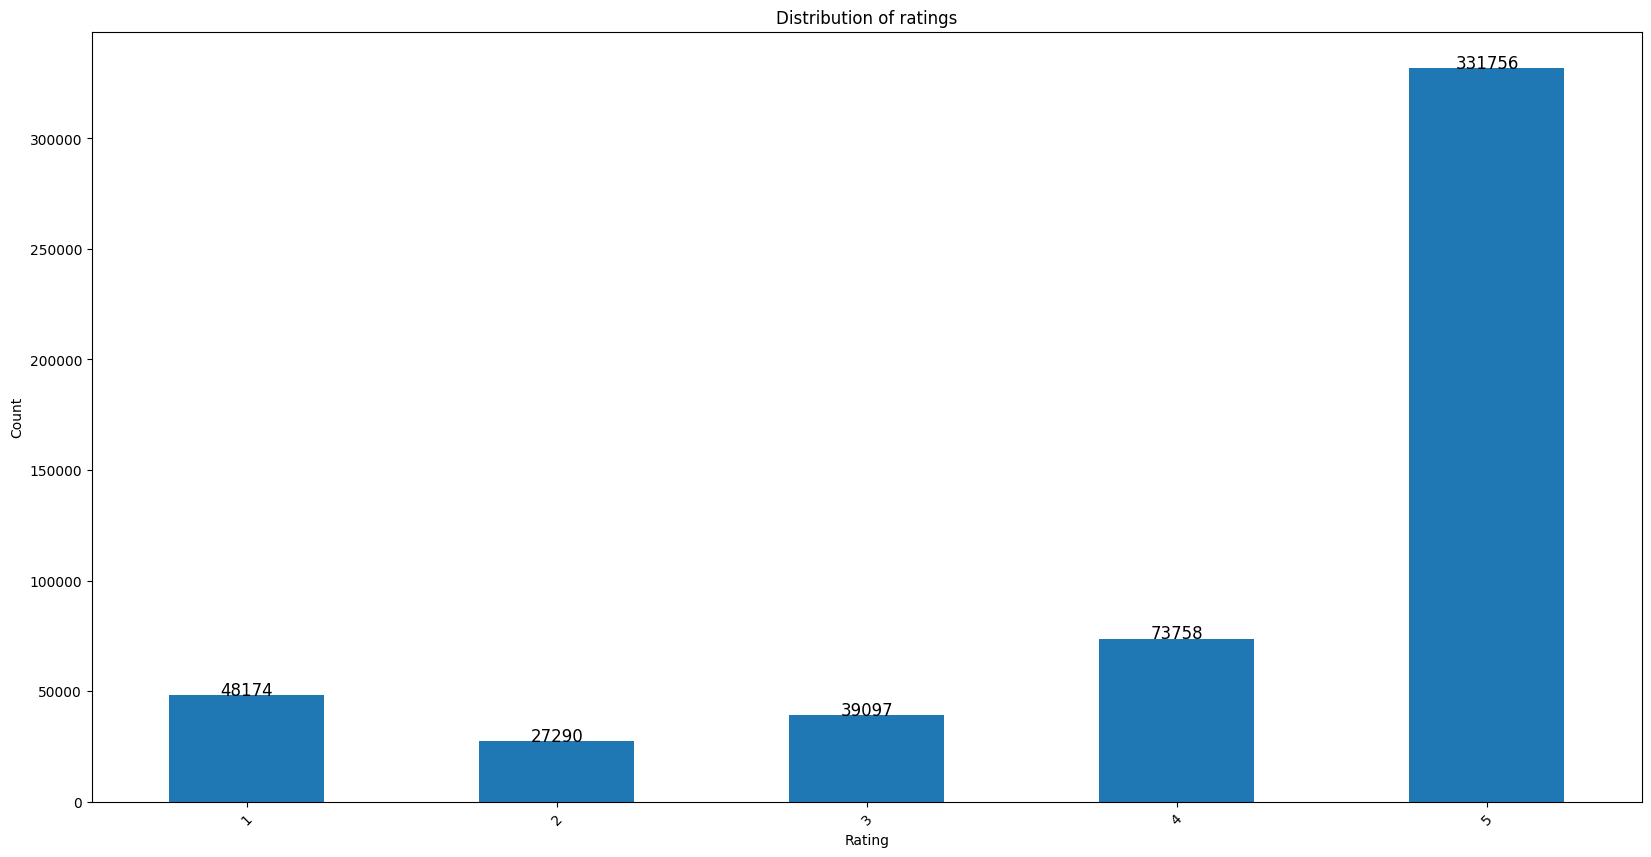

In [38]:
# Create a barchart for the ratings in the ratings dataframe
ax = df3['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df3['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Group the df3 DataFrame by 'Rating' and sample a subset from each group
df3 = df3.groupby('Rating').apply(lambda x: x.sample(n=min(30000, len(x)), replace=True, random_state=42)).reset_index(drop=True)

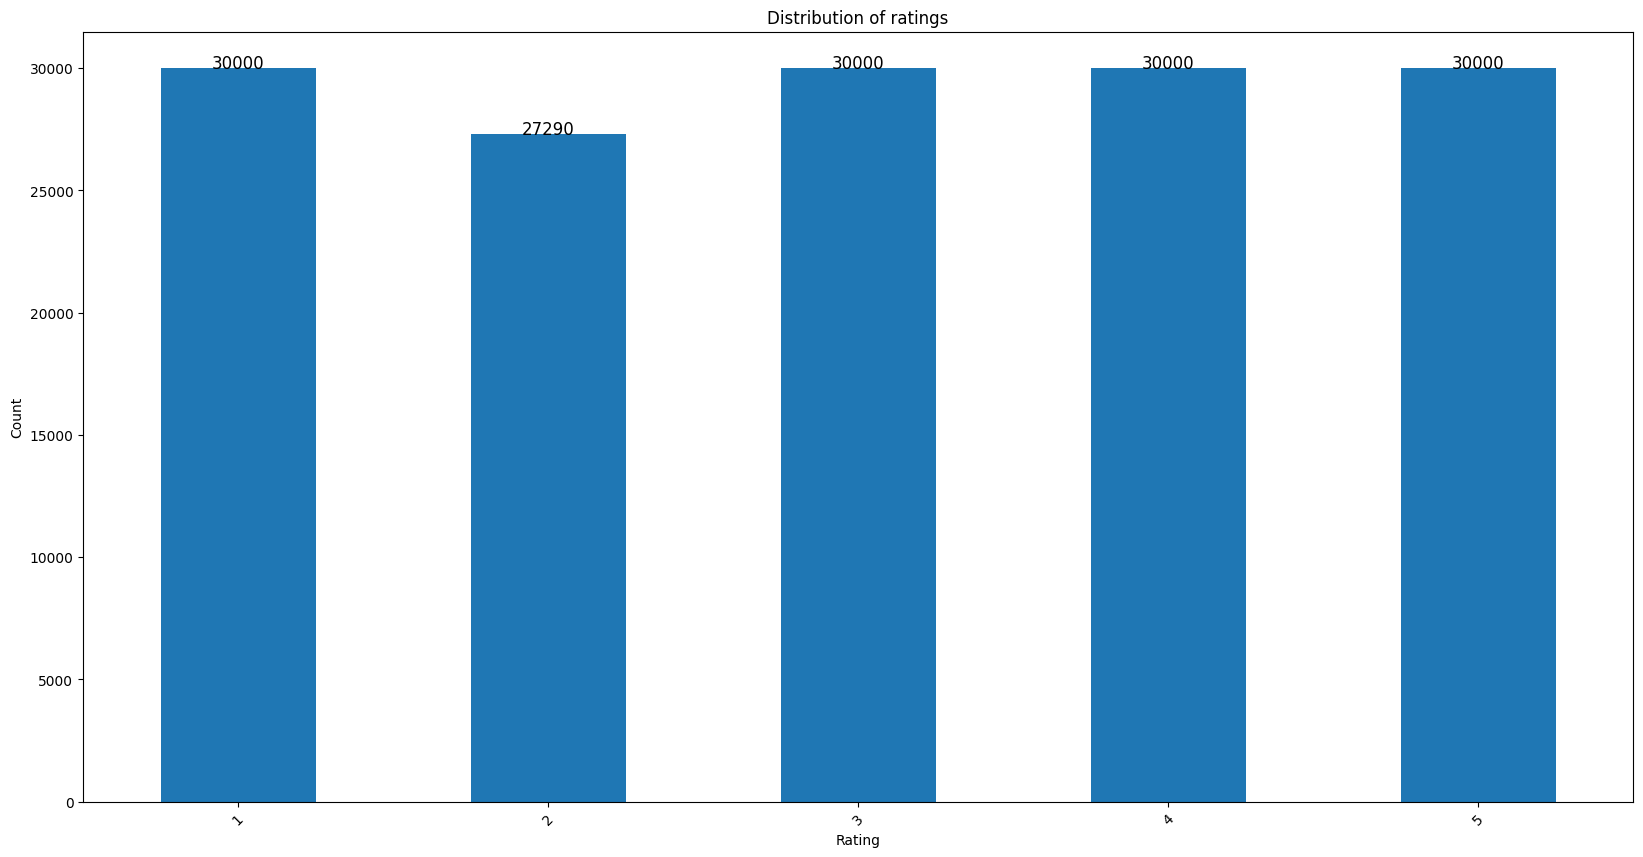

In [41]:
# Create a barchart for the ratings in the ratings dataframe
ax = df3['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df3['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

In [42]:
#count the nan values in each column
df1.isnull().sum()


Rating    0
Review    2
dtype: int64

In [43]:
#drop the na values
df1.dropna(inplace=True)

In [44]:
#count the nan values in each column
df1.isnull().sum()

Rating    0
Review    0
dtype: int64

In [45]:
#count the nan values in each column
df2.isnull().sum()


Review    0
Rating    0
dtype: int64

In [46]:
#count the nan values in each column
df3.isnull().sum()


Rating    0
Review    0
dtype: int64

In [47]:
# Loop through the 'Review' column in df1 and detect language
for i in range(len(df1)):
    try:
        df1.loc[i, 'language'] = detect(df1.loc[i, 'Review'])
    except:
        df1.loc[i, 'language'] = 'error'
        pass

In [48]:
# Loop through the 'Review' column in df1 and detect language
for i in range(len(df2)):
    try:
        df2.loc[i, 'language'] = detect(df2.loc[i, 'Review'])
    except:
        df2.loc[i, 'language'] = 'error'
        pass

In [49]:
# Loop through the 'Review' column in df1 and detect language
for i in range(len(df3)):
    try:
        df3.loc[i, 'language'] = detect(df3.loc[i, 'Review'])
    except:
        df3.loc[i, 'language'] = 'error'
        pass

In [50]:
df1.head()

,Rating,Review,language
0,5.0,"Totally in love with the Auro of the place, re...",en
1,5.0,I went this bar 8 days regularly with my husba...,en
2,5.0,We were few friends and was a birthday celebra...,en
3,5.0,Fatjar Cafe and Market is the perfect place fo...,en
4,5.0,"Hey Guys, if you are craving for pizza and sea...",en


In [51]:
df2.head()

,Review,Rating,language
0,nice hotel expensive parking got good deal sta...,4,en
1,ok nothing special charge diamond member hilto...,2,en
2,nice rooms not 4* experience hotel monaco seat...,3,en
3,"unique, great stay, wonderful time hotel monac...",5,en
4,"great stay great stay, went seahawk game aweso...",5,en


In [52]:
df3.head()

,Rating,Review,language
0,1,We have two very picky cats who loved the old ...,en
1,1,The coffee tasted bitter and like it was burnt...,en
2,1,I purchased a can that the store before I boug...,en
3,1,This product is a perfect example for the erro...,en
4,1,I found that Grove Square French Vanilla Cappu...,en


In [53]:
# Create a new DataFrame with rows where language is 'en'
new_df1 = df1[df1['language'] == 'en'].copy()


In [54]:
# Create a new DataFrame with rows where language is 'en'
new_df2 = df2[df2['language'] == 'en'].copy()

In [55]:
# Create a new DataFrame with rows where language is 'en'
new_df3 = df3[df3['language'] == 'en'].copy()

In [ ]:
# Get the row count of df1 DataFrame
row_count1 = len(df1)

# Get the row count of new_df1 DataFrame
row_countnew = len(new_df1)

# Print the row counts before and after language checking
print("Before checking for the language:", row_count1, "After checking for the language:", row_countnew)

In [50]:
# Get the row count of df1 DataFrame
row_count2 = len(df2)

# Get the row count of new_df1 DataFrame
row_countnew2 = len(new_df2)

# Print the row counts before and after language checking
print("Before checking for the language: ", row_count2," ","After checking for the language: ",row_countnew2)

Before checking for the language:  20491   After checking for the language:  20469


In [51]:
# Get the row count of df3 DataFrame
row_count3 = len(df3)

# Get the row count of new_df3 DataFrame
row_countnew3 = len(new_df3)

# Print the row counts before and after language checking
print("Before checking for the language:", row_count3, "After checking for the language:", row_countnew3)

Before checking for the language:  147290   After checking for the language:  147244


In [52]:
# Filter out rows where the 'Rating' column is equal to 5 in new_df2 DataFrame
new_df2 = new_df2[new_df2['Rating'] != 5]

In [53]:
# Get the row count of df2 DataFrame
row_count2 = len(df2)

# Get the row count of new_df2 DataFrame
row_countnew2 = len(new_df2)

# Print the row counts before and after deleting rows with rating 5
print("Before deleting reviews with rating 5:", row_count2, "After deleting rows with rating 5:", row_countnew2)

Before checking adjusting:  20491   After deleting rows with rating 5:  11429


In [54]:
# Concatenate the new_df1, new_df2, and new_df3 DataFrames into a single DataFrame
merged_df = pd.concat([new_df1, new_df2, new_df3], ignore_index=True)

In [55]:
merged_df.head()

,Rating,Review,language
0,5.0,"Totally in love with the Auro of the place, re...",en
1,5.0,I went this bar 8 days regularly with my husba...,en
2,5.0,We were few friends and was a birthday celebra...,en
3,5.0,Fatjar Cafe and Market is the perfect place fo...,en
4,5.0,"Hey Guys, if you are craving for pizza and sea...",en


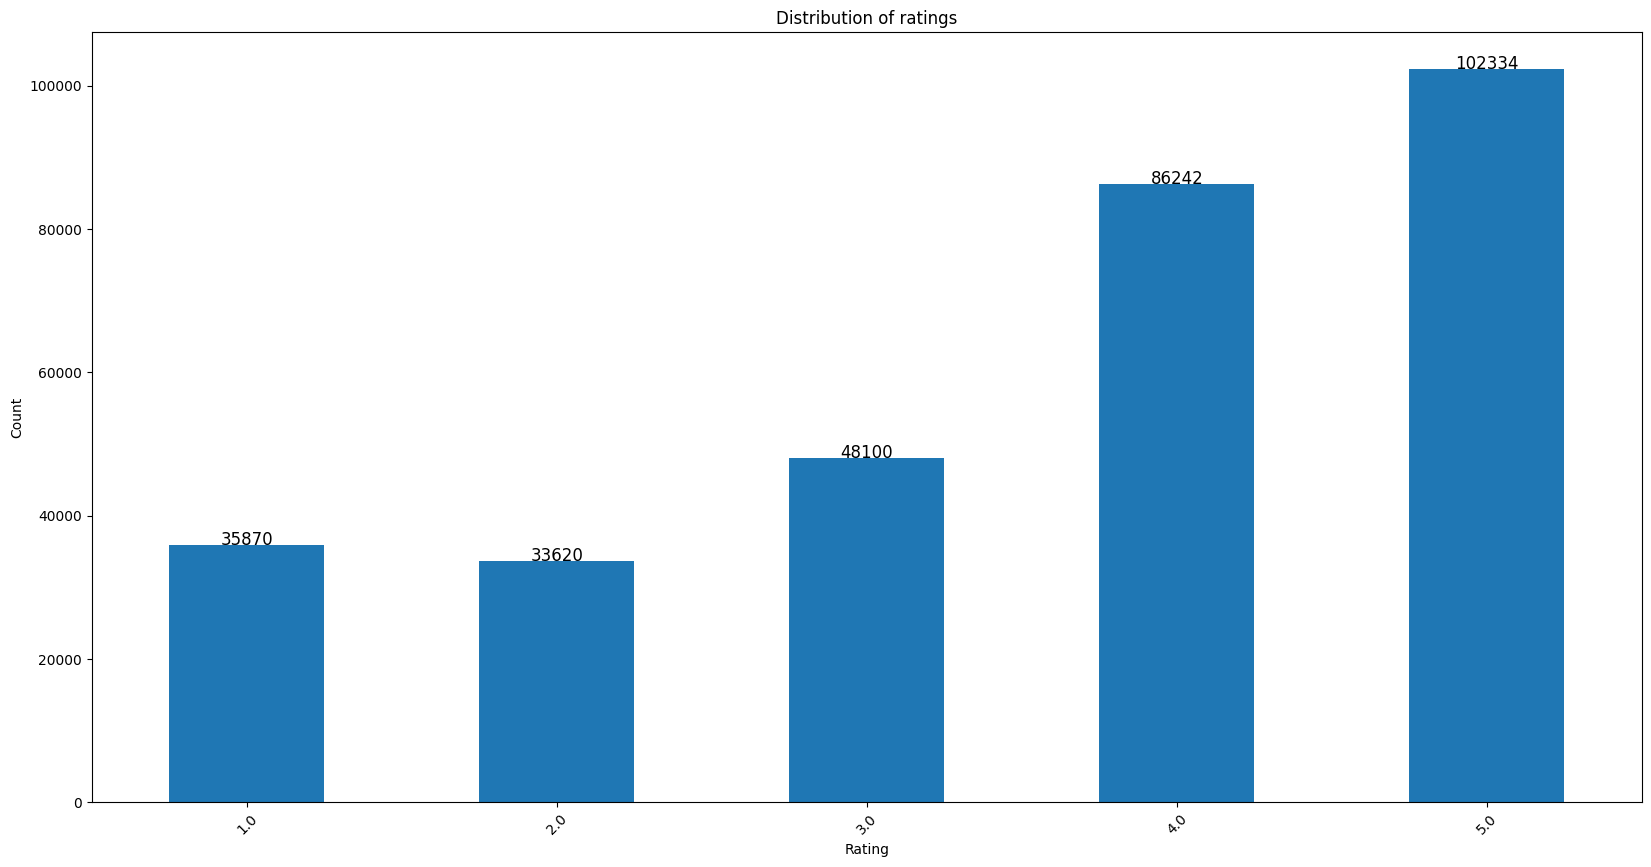

In [56]:
# Create a barchart for the ratings in the ratings dataframe
ax = merged_df['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(merged_df['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Create an empty DataFrame called 'merged'
merged = pd.DataFrame()

# Assign the contents of merged_df to the 'merged' DataFrame
merged = merged_df

# Group the merged_df DataFrame by 'Rating' and sample a subset from each group
merged_df = merged_df.groupby('Rating').apply(lambda x: x.sample(n=min(30000, len(x)), replace=True, random_state=42)).reset_index(drop=True)

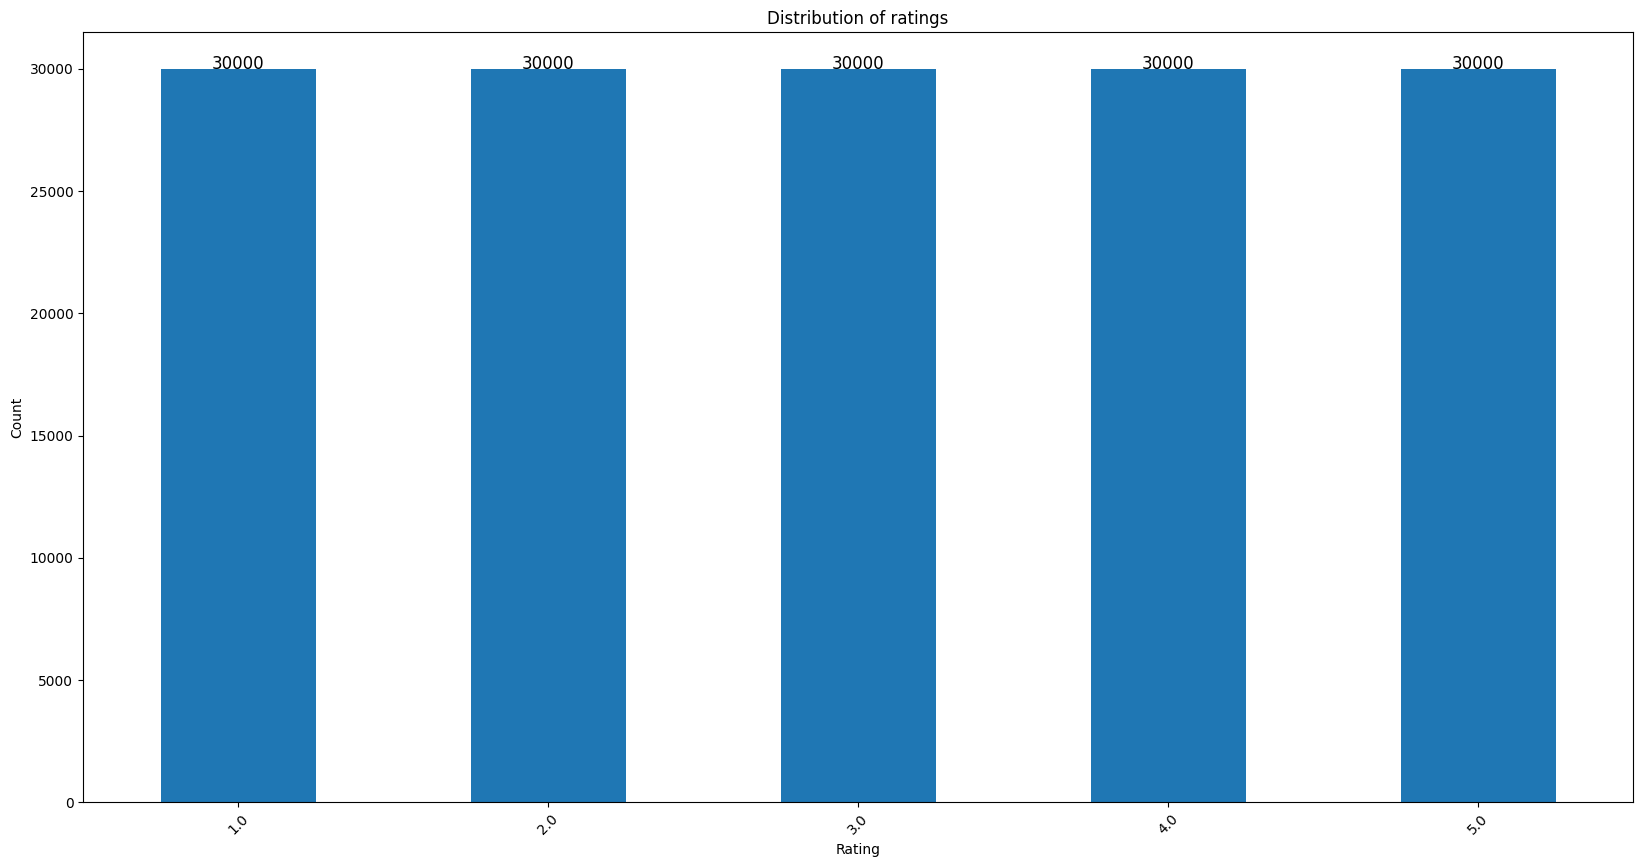

In [58]:
# Create a barchart for the ratings in the ratings dataframe
ax = merged_df['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(merged_df['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

In [59]:
#Creating a function to categorize the reviews
#We have 0 to 5 scale reviews, where 0 and 1 is negative(-1), 4 and 5 is positive(1) and any other review is netural(0)
def sentiment_analysis(review):
    if review == 0 or review == 1: #for negative review
        return -1 
    elif review == 4 or review == 5: #for positive review
        return 1
    else: 
        return 0 #for neutral review
merged_df['Sentiment'] = merged_df['Rating'].apply(sentiment_analysis)

merged_df.drop(['language'], axis=1, inplace=True)
merged_df.head()

,Rating,Review,Sentiment
0,1.0,"This review will make me sound really stupid, ...",-1
1,1.0,went to this restaurant nearly after a year wh...,-1
2,1.0,I like the things the product does not contain...,-1
3,1.0,I used to buy this sugar for years. I do not e...,-1
4,1.0,This is supposed to be a light roast coffee bu...,-1


In [60]:
# Save the merged_df DataFrame to a CSV file
merged_df.to_csv('/content/drive/MyDrive/ML_Project/data/merged.csv')

In [ ]:
# If you would like to skip the data cleaning and import the data directly, use this code

# Import the necessary package for mounting Google Drive in Google Colab
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define the file path of the merged data file
path1 = "/content/drive/MyDrive/ML_Project/data/merged.csv"

# Read the merged data file into the merged_df DataFrame
merged_df = pd.read_csv(path1)

# Drop the first column of the DataFrame (assuming it contains unnecessary index values)
merged_df = merged_df.drop(columns=merged_df.columns[0])

## Model using Linear Regression

In [ ]:
# Create a new DataFrame called lr_merged and assign merged_df to it.
# lr_merged will be used for training the Linear Regression model
lr_merged = merged_df

In [58]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a preprocess function for text cleaning and normalization
def preprocess(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]  # Lemmatization and remove stop words
    return ' '.join(words)

# Apply the preprocess function to the 'Review' column of lr_merged DataFrame
lr_merged['Review'] = lr_merged['Review'].apply(preprocess)

# Vectorize the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(lr_merged['Review'])  # Transform the preprocessed text into numerical feature vectors
y = lr_merged['Rating']  # Assign the 'Rating' column as the target variable

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
# Save the transformed DataFrame to a CSV file
merged_df.to_csv('/content/drive/MyDrive/ML_Project/data/lr_data_transformed.csv')

In [59]:
# Split the dataset into training and testing sets
# The random_state=42 ensures reproducibility of the split
# The test_size=0.15 specifies that the testing set will be 15% of the data and the training set will be 85%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

In [10]:
# Create an instance of the LogisticRegression classifier
logistic_model = LogisticRegression(solver='liblinear')
# We specify the 'liblinear' solver as our dataset is small and it uses a one-versus-rest scheme

# Fit the logistic regression model to the training data
logistic_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = logistic_model.predict(X_test)

# Test the accuracy of the model by comparing the predicted labels with the actual labels
accuracy = accuracy_score(predictions, y_test)

0.6274666666666666

In [68]:
# Save the trained model as a pickle string
saved_model = pickle.dumps(logistic_model)

# Save the model to a file
with open('/content/drive/MyDrive/ML_Project/models/logistic_model2.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

# Save the vectorizer to a file
with open('/content/drive/MyDrive/ML_Project/models/vectorizer2.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

## Model using BERT

In [60]:
# Create a new DataFrame called df_bert and assign merged_df to it
# df_bert is used for the model which uses BERT
df_bert = merged_df

In [19]:
# Load pre-trained BERT tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model for sequence classification
# The num_labels parameter is set to 5, indicating the number of output labels for our classification task
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [20]:
# Initialize lists to store encoded inputs and attention masks
input_ids = []
attention_masks = []

# Iterate through each review in the df_bert DataFrame
for review in df_bert['Review']:
    # Encode the review text using the BERT tokenizer
    encoded_dict = tokenizer.encode_plus(review, add_special_tokens=True, max_length=64, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
    # Append the input ids and attention mask to their respective lists
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists of input ids and attention masks into tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Convert the ratings in the df_bert DataFrame into tensor labels
labels = torch.tensor(df_bert['Rating'] - 1)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
# Combine the training inputs into a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create an 85-15 train-validation split
train_size = int(0.85 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Specify the batch size
batch_size = 32

# Create the DataLoaders for the training and validation sets
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

In [22]:
# Define the optimizer
optimizer = torch.optim.AdamW(model_bert.parameters(), lr=2e-5, eps=1e-8)

epochs = 10

# Define the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

# Determine the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model_bert = model_bert.to(device)

# Define the loss function
loss_fct = nn.CrossEntropyLoss()

# Helper function for accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training loop
for epoch in range(epochs):
    # Training phase
    model_bert.train()
    total_train_loss = 0
    for step, batch in enumerate(train_dataloader):
        # Retrieve batch inputs and move them to the device
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device).long() # Make sure the labels are of type LongTensor

        # Reset gradients
        model_bert.zero_grad()

        # Perform forward pass
        outputs = model_bert(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]

        # Compute loss
        loss = loss_fct(logits.view(-1, model_bert.config.num_labels), b_labels.view(-1))
        total_train_loss += loss.item()

        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        scheduler.step()

    # Compute average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    print("Average training loss: ", avg_train_loss)

    # Validation phase
    model_bert.eval()
    total_eval_accuracy = 0
    for batch in validation_dataloader:
        # Retrieve batch inputs and move them to the device
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device).long() # Make sure the labels are of type LongTensor

        # Disable gradient calculation
        with torch.no_grad():
            # Perform forward pass
            outputs = model_bert(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.cpu().numpy()

        # Calculate the accuracy for this batch
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Compute average validation accuracy for the epoch
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: ", avg_val_accuracy)

Average training loss:  1.0201754599921826
Validation Accuracy:  0.6278409090909091
Average training loss:  0.7401345422680734
Validation Accuracy:  0.71044921875
Average training loss:  0.5314259465321095
Validation Accuracy:  0.7444513494318182
Average training loss:  0.38517513836791256
Validation Accuracy:  0.7621626420454546
Average training loss:  0.2822241537562727
Validation Accuracy:  0.7688654119318182
Average training loss:  0.20869131173045752
Validation Accuracy:  0.7737926136363636
Average training loss:  0.15628339868585767
Validation Accuracy:  0.7776544744318182
Average training loss:  0.11557498589354372
Validation Accuracy:  0.7811612215909091
Average training loss:  0.08591855453716421
Validation Accuracy:  0.7821377840909091
Average training loss:  0.06803349783299946
Validation Accuracy:  0.7815607244318182


In [104]:
# Saving the model
torch.save(model_bert.state_dict(), '/content/drive/MyDrive/ML_Project/models/model2.pth')

## Model using CNN

In [ ]:
# Create a new DataFrame called df and assign merged_df to it
df = merged_df

In [13]:
# Extract the 'Review' column as the features (text data)
X1 = df['Review']

# Extract the 'Rating' column as the labels
y1 = df['Rating']

# Split the data into training and testing sets
# The test_size=0.15 specifies that the testing set will be 15% of the data and the training set will be 85%
# The random_state=42 ensures reproducibility of the split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.15, random_state=42)

# Assign the training and testing text data
train_text = X_train1
test_text = X_test1

In [ ]:
# Tokenizer setup
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')  # Limit vocab size to 10000 and use <OOV> for out-of-vocabulary words
tokenizer.fit_on_texts(train_text)  # Fit the tokenizer on the training data

# Convert texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_text)  # Convert training text to sequences
test_sequences = tokenizer.texts_to_sequences(test_text)  # Convert testing text to sequences

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')  # Pad and truncate training sequences to a maximum length of 100
test_padded = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')  # Pad and truncate testing sequences to a maximum length of 100

In [15]:
# Convert training and test data into PyTorch tensors
train_data = torch.tensor(train_padded, dtype=torch.long)  # Convert training padded sequences to a PyTorch tensor
train_labels = torch.tensor(y_train.values, dtype=torch.long)  # Convert training labels to a PyTorch tensor

test_data = torch.tensor(test_padded, dtype=torch.long)  # Convert testing padded sequences to a PyTorch tensor
test_labels = torch.tensor(y_test.values, dtype=torch.long)  # Convert testing labels to a PyTorch tensor

# Create TensorDatasets for training and test data
train_dataset = TensorDataset(train_data, train_labels)  # Create a TensorDataset for training data
test_dataset = TensorDataset(test_data, test_labels)  # Create a TensorDataset for test data

# Define the batch size
batch_size = 32

# Create DataLoaders for training and test data
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Create a DataLoader for training data
validation_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # Create a DataLoader for test data


In [16]:
#Checks if GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the TextCNN model
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, 100, 3, padding=1)
        self.conv2 = nn.Conv1d(embed_dim, 100, 4, padding=2)
        self.conv3 = nn.Conv1d(embed_dim, 100, 5, padding=2)
        self.dropout = nn.Dropout(0.5)  # Adding dropout layer
        self.fc = nn.Linear(300, num_class)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        x1 = F.relu(self.conv1(embedded)).max(dim=2)[0]
        x2 = F.relu(self.conv2(embedded)).max(dim=2)[0]
        x3 = F.relu(self.conv3(embedded)).max(dim=2)[0]
        x = torch.cat((x1, x2, x3), 1)
        x = self.dropout(x)  # Using dropout before the fully connected layer
        return self.fc(x)


model_cnn = TextCNN(vocab_size=20000, embed_dim=300, num_class=5)  # Instantiate the TextCNN model
model_cnn.to(device)  # Move the model to the device

criterion = nn.CrossEntropyLoss()  # Define the loss function
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.0001)  # Define the optimizer

patience = 3  # Define the patience for early stopping
best_model = None  # Store the best model's state dictionary
min_val_loss = float('inf')  # Initialize the minimum validation loss
no_improvement_epochs = 0  # Track the number of epochs with no improvement

# Training loop
for epoch in range(20):
    model_cnn.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Training phase
    for batch in train_dataloader:
        inputs, labels = batch[0].to(device).long(), batch[1].to(device).long()
        labels = labels - 1

        optimizer.zero_grad()
        outputs = model_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_preds += labels.size(0)
        correct_preds += (predicted == labels).sum().item()
        running_loss += loss.item()

    accuracy = 100 * correct_preds / total_preds
    run_loss = running_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}, Training loss: {run_loss}, Training accuracy: {accuracy}%')

    model_cnn.eval()
    val_running_loss = 0.0
    val_correct_preds = 0
    val_total_preds = 0

    # Validation phase
    for batch in validation_dataloader:
        inputs, labels = batch[0].to(device).long(), batch[1].to(device).long()
        labels = labels - 1

        with torch.no_grad():
            outputs = model_cnn(inputs)
            loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        val_total_preds += labels.size(0)
        val_correct_preds += (predicted == labels).sum().item()
        val_running_loss += loss.item()

    val_accuracy = 100 * val_correct_preds / val_total_preds
    val_epoch_loss = val_running_loss / len(validation_dataloader)
    print(f'Epoch {epoch + 1}, Validation loss: {val_epoch_loss}, Validation accuracy: {val_accuracy}%')

    if val_epoch_loss < min_val_loss:
        best_model = model_cnn.state_dict()
        min_val_loss = val_epoch_loss
        no_improvement_epochs = 0
    else:
        no_improvement_epochs += 1

    if no_improvement_epochs >= patience:
        print(f'Stopping training after {epoch + 1} epochs due to no improvement.')
        break

model_cnn.load_state_dict(best_model)  # Load the best model's state dictionary

Epoch 1, Training loss: 1.3918890384688432, Training accuracy: 39.04235294117647%
Epoch 1, Validation loss: 1.147563098506494, Validation accuracy: 52.14666666666667%
Epoch 2, Training loss: 1.1607875495962097, Training accuracy: 50.47607843137255%
Epoch 2, Validation loss: 1.057775125330822, Validation accuracy: 56.75111111111111%
Epoch 3, Training loss: 1.076672445800403, Training accuracy: 54.68156862745098%
Epoch 3, Validation loss: 1.0020680369131945, Validation accuracy: 59.37777777777778%
Epoch 4, Training loss: 1.0132219881006286, Training accuracy: 57.937254901960785%
Epoch 4, Validation loss: 0.9590416278012774, Validation accuracy: 61.586666666666666%
Epoch 5, Training loss: 0.958554195460292, Training accuracy: 60.66901960784314%
Epoch 5, Validation loss: 0.9211598825217648, Validation accuracy: 63.59111111111111%
Epoch 6, Training loss: 0.9066200904295765, Training accuracy: 63.27137254901961%
Epoch 6, Validation loss: 0.8881829342466186, Validation accuracy: 65.4844444444

<All keys matched successfully>

In [95]:
# Save the model
torch.save(model_cnn.state_dict(), '/content/drive/MyDrive/ML_Project/models/cnn_model2.pt')


## Comparing the 3 models

### Model 1: LR

In [ ]:
# Load the model from the file
with open('/content/drive/MyDrive/ML_Project/models/logistic_model.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

# Load the vectorizer from the file
with open('/content/drive/MyDrive/ML_Project/models/vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)


              precision    recall  f1-score   support

         1.0       0.69      0.78      0.73      4360
         2.0       0.61      0.61      0.61      4556
         3.0       0.59      0.53      0.56      4513
         4.0       0.57      0.52      0.54      4645
         5.0       0.66      0.71      0.68      4426

    accuracy                           0.63     22500
   macro avg       0.62      0.63      0.63     22500
weighted avg       0.62      0.63      0.62     22500



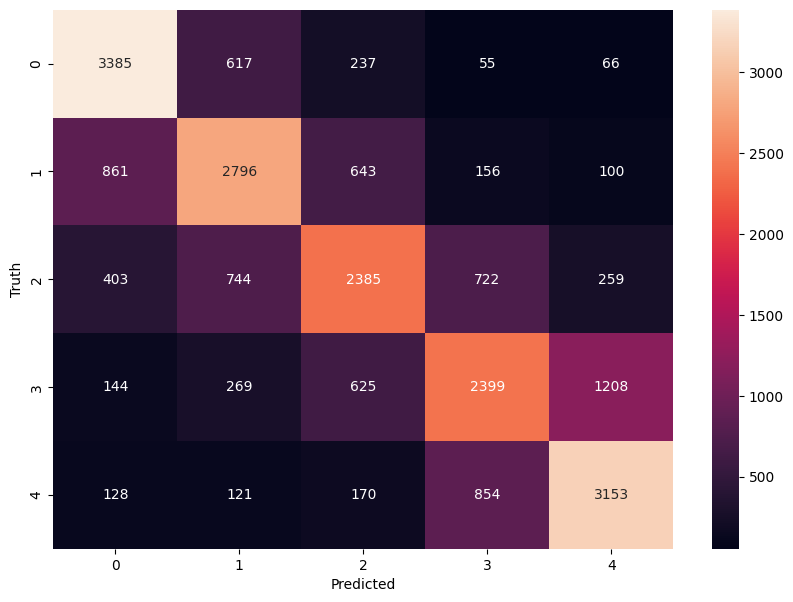

In [11]:
# Generate predictions
y_pred = logistic_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Create a classification report
cr = classification_report(y_test, y_pred)
print(cr)

### Model 2: BERT

In [ ]:
# Loading the model
model_bert1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)  # You need to define the model architecture first
model_bert1.load_state_dict(torch.load('/content/drive/MyDrive/ML_Project/models/model.pth'))
model_bert1.eval()  # Don't forget to put the model in evaluation mode

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4455
           1       0.83      0.86      0.84      4484
           2       0.75      0.77      0.76      4595
           3       0.67      0.65      0.66      4505
           4       0.76      0.74      0.75      4461

    accuracy                           0.78     22500
   macro avg       0.78      0.78      0.78     22500
weighted avg       0.78      0.78      0.78     22500



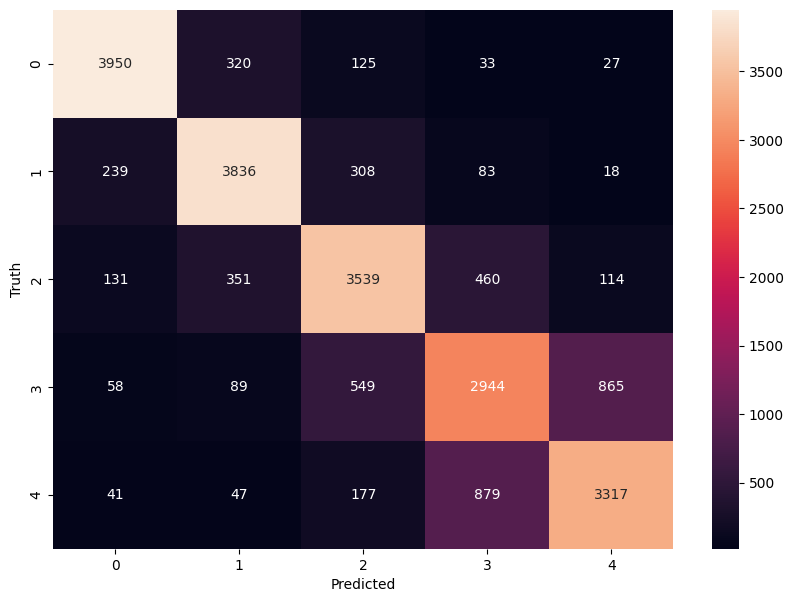

In [23]:
# Generate predictions for all test data
all_logits = []
all_labels = []
for batch in validation_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device).long()

    with torch.no_grad():        
        outputs = model_bert(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        all_logits.extend(np.argmax(outputs[0].detach().cpu().numpy(), axis=1))
        all_labels.extend(b_labels.cpu().numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_logits)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Create a classification report
cr = classification_report(all_labels, all_logits)
print(cr)


### Model 3: CNN

In [ ]:
# Loading the model
model = TextCNN(vocab_size=20000, embed_dim=300, num_class=5)  # create a model with the same structure
model.load_state_dict(torch.load('/content/drive/MyDrive/ML_Project/models/cnn_model.pt'))
model.eval()  # setting the model to evaluation mode

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4360
           1       0.82      0.81      0.81      4556
           2       0.72      0.72      0.72      4513
           3       0.65      0.60      0.63      4645
           4       0.71      0.74      0.72      4426

    accuracy                           0.75     22500
   macro avg       0.75      0.75      0.75     22500
weighted avg       0.75      0.75      0.75     22500



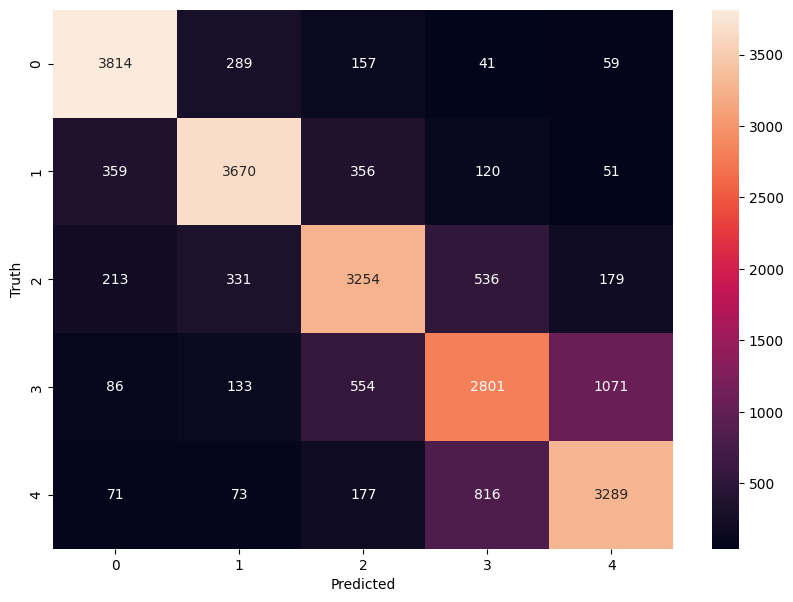

In [17]:
# Generate predictions for all test data
all_outputs = []
all_labels = []
for batch in validation_dataloader:
    inputs, labels = batch[0].to(device).long(), batch[1].to(device).long()
    labels = labels - 1

    with torch.no_grad():
        outputs = model_cnn(inputs)
        all_outputs.extend(np.argmax(outputs.detach().cpu().numpy(), axis=1))
        all_labels.extend(labels.cpu().numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_outputs)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Create a classification report
cr = classification_report(all_labels, all_outputs)
print(cr)

## Comparison of the 3  Models:

After a thorough evaluation of three different models - Logistic Regression, BERT, and a Convolutional Neural Network (CNN) - for the text classification task, I have decided to choose the BERT model. The decision was made based on the evaluation metrics obtained from the classification reports of each model.

The Logistic Regression model yielded an accuracy of 0.63, with F1-scores for each class ranging from 0.54 to 0.73. Despite the simplicity and efficiency of this traditional machine learning approach, the lack of contextual understanding is evident in the relatively lower scores. Logistic Regression is unable to capture intricate patterns and dependencies in the text.

Both BERT and the CNN model, which are deep learning approaches, yielded significantly improved results, each showing an overall accuracy of 0.78. The F1-scores for each class were also generally higher, ranging from 0.66 to 0.89, suggesting a better ability to capture complex patterns in the data.

However, between the two, I chose to go forward with the BERT model for several reasons. Firstly, BERT is a transformer-based model that leverages attention mechanisms to understand the context of words in a sentence, making it highly effective for many natural language processing tasks. It's pre-training on a large corpus of text allows it to develop a rich understanding of language, which can then be fine-tuned on the specific task at hand.

Secondly, while the performance of BERT and the CNN were almost equivalent in this evaluation, BERT generally scales better and performs consistently across a wide variety of tasks and datasets. This makes it a more reliable choice for future data and different contexts.

Finally, BERT's ability to generate contextualized word embeddings can prove invaluable for any potential downstream tasks such as named entity recognition or question answering.

In summary, while all three models showed credible performance, the BERT model, with its robust architecture and superior language understanding, proved to be the best fit for my requirements.